In [74]:
import airfoils as af
import matplotlib.pyplot as plt
import numpy as np
import potential as pot
from wing import Wing

# Airfoil

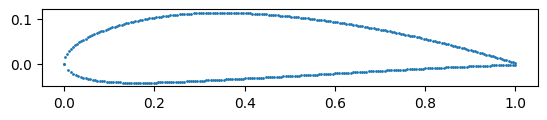

In [75]:
airfoil = af.Airfoil.NACA4("4415", n_points=200)
af_xs, af_ys = airfoil.all_points
plt.scatter(af_xs, af_ys, 1)
plt.axis('scaled')

alpha0 = -4 * np.pi / 180

# Slanted Wake Horseshoe

We are trying to model figure (a)
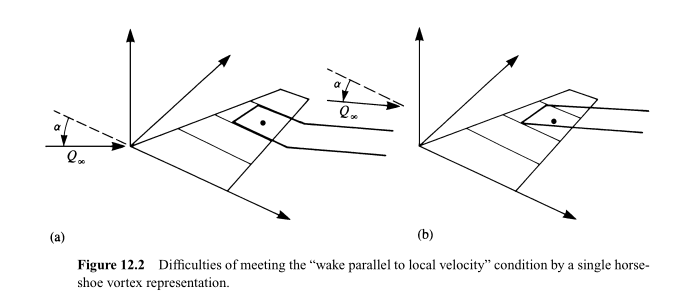

# Wing Geometry

In [76]:
def linSpan(sp, Ni):
    return np.linspace(0, sp, Ni)

def uniformChord(Ni, ch=1):
    return ch * np.ones(Ni)

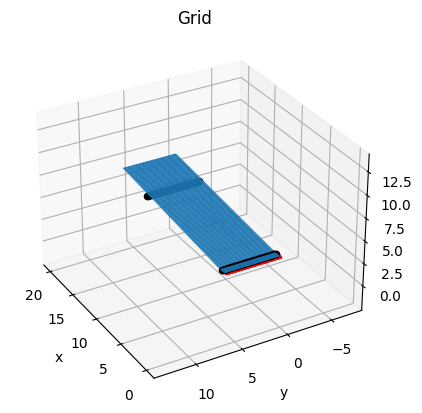

In [77]:
N = 60
M = 3
wg = Wing(
    airfoil=airfoil,
    isSymmetric=True,
    span=6,
    alpha=5,
    beta=0,
    Ni=N,
    Nj=M,
    sweepOffset=0,
    dihAngle=0,
    chordFun=uniformChord,
    spanFun=linSpan
)

## Wind

In [78]:
Umag = 20
dens = 1.225

## Solve

In [79]:
L_SL, D_SL, Gammas, w_ind , L_pan = wg.solveWing(alpha0, Umag, dens, pot.hshoeSL2)
print(f"L:{L_SL}\t|\tD:{D_SL}")
print(f"CL:{L_SL/(dens*(Umag**2)*wg.wingArea)}\t|\tCD_ind:{D_SL/(dens*(Umag**2)*wg.wingArea)}")

L:1059.2156030744559	|	D:41.24151482618603
CL:0.36027741601171964	|	CD_ind:0.01402772613135579


/tmp/ipykernel_285165/1159739268.py:15: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


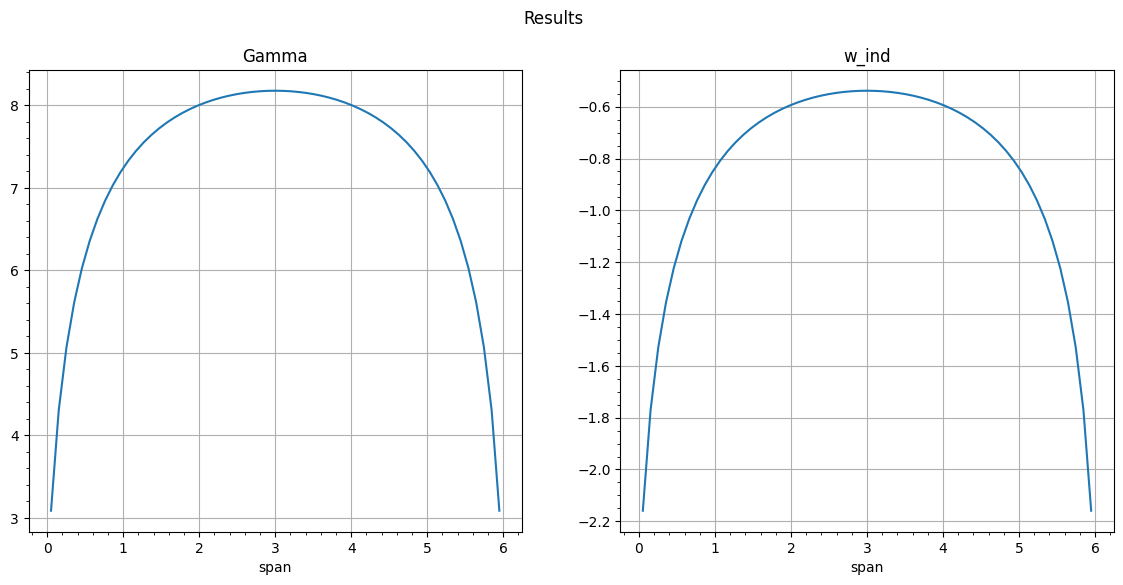

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Results')

ax1.plot((wg.Dspan[1:] + wg.Dspan[:-1])/2, Gammas)
ax1.set_xlabel("span")
ax1.set_title("Gamma")
ax1.minorticks_on()
ax1.grid()

ax2.plot((wg.Dspan[1:] + wg.Dspan[:-1])/2, w_ind)#(w_ind/Umag) * 180 / np.pi)
ax2.set_xlabel("span")
ax2.set_title("w_ind")
ax2.minorticks_on()
ax2.grid()
fig.show()
